<h1 style="color:#004080; font-family:'Times New Roman'; background-color:#f5e6cc; padding:15px; border-radius:10px; text-align:center;">
🚗 <b>In-Vehicle Coupon Recommendation Prediction
</h1>

In [3]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset 
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Data Overview
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (12684, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar              

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Drop duplicates
df = df.drop_duplicates()
print("Shape:", df.shape)

Shape: (12610, 26)


In [7]:
#  Data cleaning and handling missing values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:

# Drop 'car' column (mostly missing)
df = df.drop(columns='car')

# Fill missing values with 'never'
fill_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in fill_cols:
    df[col] = df[col].fillna('never')


In [10]:
#  Data cleaning and handling missing values
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [16]:
print("Shape:", df.shape)

Shape: (12610, 25)


# Exploratory Data Analysis (EDA)
EDA (Exploratory Data Analysis) helps us understand the dataset visually and statistically.

We'll explore the dataset by:

Checking target variable distribution (coupon acceptance)

Exploring key features: age, gender, destination, coupon type, weather, etc.

Using charts like bar plots, count plots, pie charts, and histograms

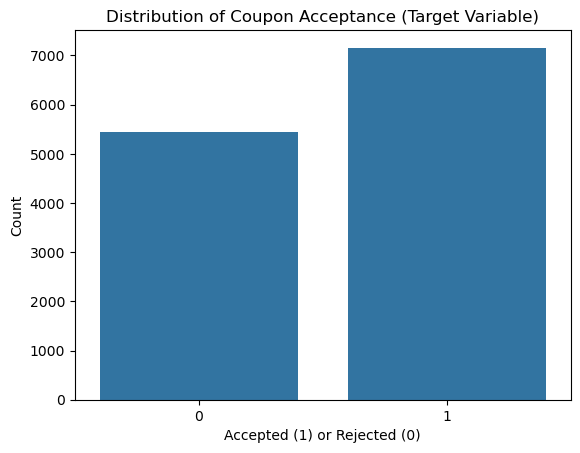

In [20]:
sns.countplot(x='Y', data=df)
plt.title("Distribution of Coupon Acceptance (Target Variable)")
plt.xlabel("Accepted (1) or Rejected (0)")
plt.ylabel("Count")
plt.show()

### Age Distribution

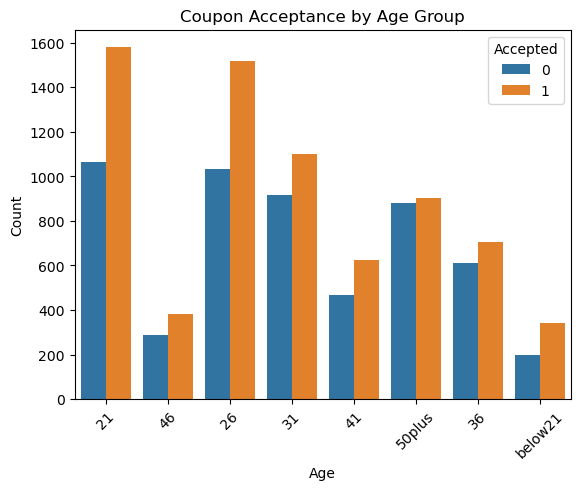

In [23]:
sns.countplot(x='age', hue='Y', data=df)
plt.title("Coupon Acceptance by Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Accepted')
plt.show()



## Gender Breakdown

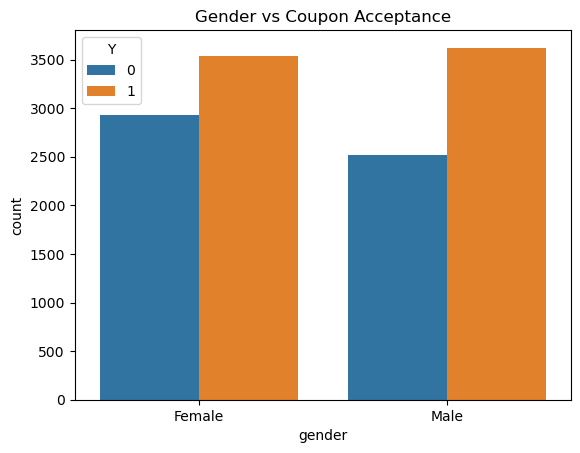

In [26]:
sns.countplot(x='gender', hue='Y', data=df)
plt.title('Gender vs Coupon Acceptance')
plt.show()

## Destination vs Acceptance

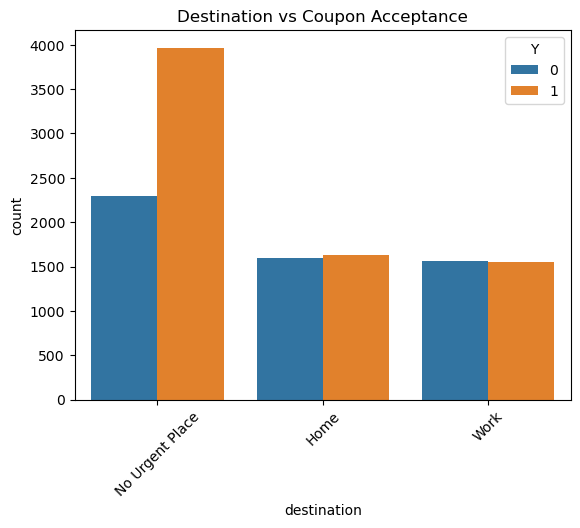

In [29]:
sns.countplot(x='destination', hue='Y', data=df)
plt.title('Destination vs Coupon Acceptance')
plt.xticks(rotation=45)
plt.show()

## Coupon Type Preferences

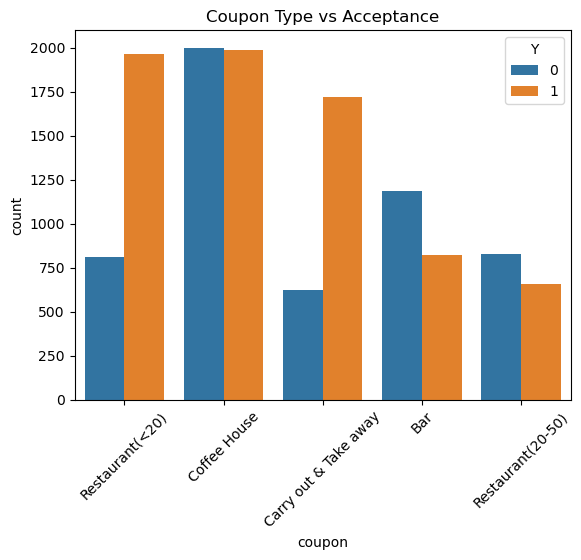

In [32]:
sns.countplot(x='coupon', hue='Y', data=df)
plt.title('Coupon Type vs Acceptance')
plt.xticks(rotation=45)
plt.show()

## Weather Impact

<Axes: xlabel='weather', ylabel='count'>

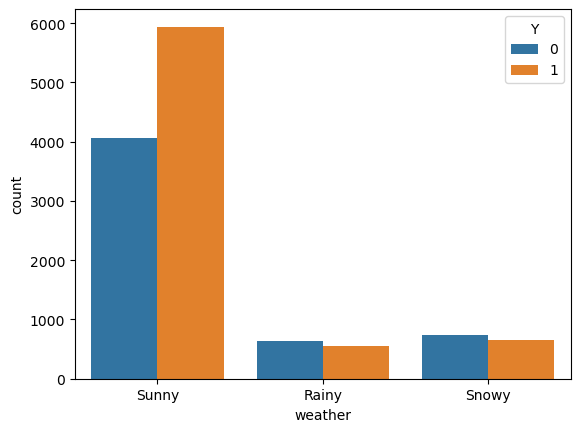

In [35]:
sns.countplot(x='weather', hue='Y', data=df)

## Outlier Handling

In [38]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


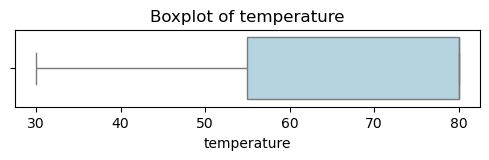

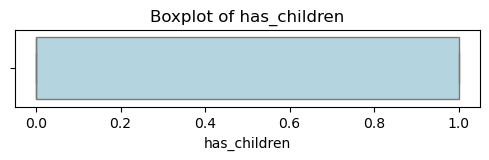

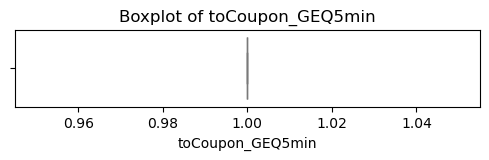

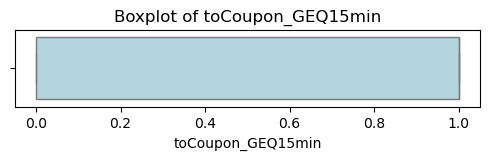

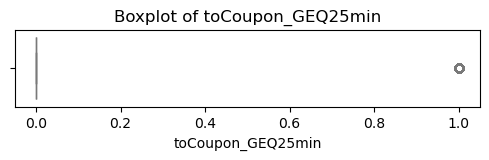

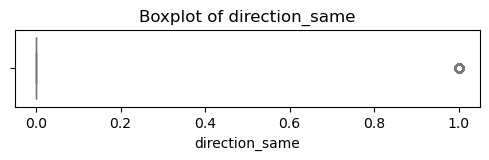

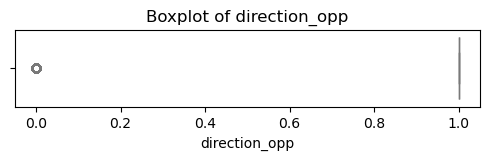

In [40]:

for col in numeric_cols:
    if col != 'Y':
        plt.figure(figsize=(6, 1))
        sns.boxplot(data=df, x=col, color='lightblue')
        plt.title(f'Boxplot of {col}')
        plt.show()



In [41]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to each numeric column (except 'Y')
for col in numeric_cols:
    if col != 'Y':
        df = remove_outliers_iqr(df, col)


In [42]:
print("New shape after removing outliers:", df.shape)


New shape after removing outliers: (8429, 25)


# Feature Encoding & Engineering


We used <B> LabelEncoder </B> to convert all categorical variables into numeric values.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,4,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,4,4,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,4,4,1,0,1,1,0,0,1,0


# Train-Test Split

Separate target and features

Split into 80% training and 20% testing

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training&Evaluation
Train <b>3</b> models:

<b><li>1.Logistic Regression

<b><li>2.Decision Tree

<b><li>3.Random Forest</li></b>


### 1.Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Logistic Regression
log_preds = log_model.predict(X_test)
print("Logistic Regression results are")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("ROC AUC:", roc_auc_score(y_test, log_preds))

Logistic Regression results are
Accuracy: 0.66429418742586
F1 Score: 0.7424931756141947
ROC AUC: 0.6280879146154288


### 2.Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_preds = dt_model.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_roc_auc = roc_auc_score(y_test, dt_preds)

print("🔍 Decision Tree Results are:")
print("Accuracy:", dt_accuracy)
print("F1 Score:", dt_f1)
print("ROC AUC:", dt_roc_auc)

🔍 Decision Tree Results are:
Accuracy: 0.6957295373665481
F1 Score: 0.7464162135442413
ROC AUC: 0.6842464935444063


### 3.Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)

print("Random Forest Results:")
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1)
print("ROC AUC:", rf_roc_auc)


Random Forest Results:
Accuracy: 0.7603795966785291
F1 Score: 0.8061420345489443
ROC AUC: 0.7438905180840666


### Hyperparameter Tuning
Use <b>GridSearchCV </B>to improve model performance.

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = best_rf_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned F1 Score:", f1_score(y_test, y_pred))
print("Tuned ROC AUC:", roc_auc_score(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 200}
Tuned Accuracy: 0.7621589561091341
Tuned F1 Score: 0.8087744396757273
Tuned ROC AUC: 0.7440298474454072


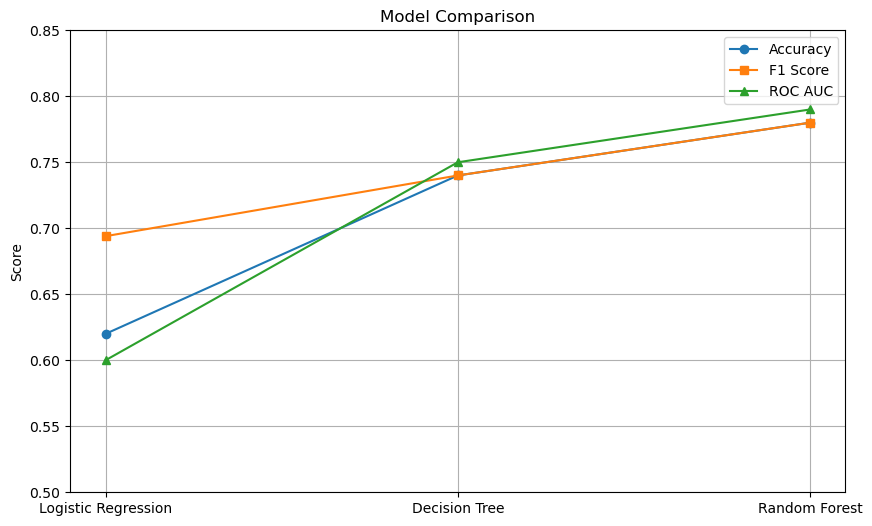

In [63]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.62, 0.74, 0.78]
f1_scores = [0.694, 0.74, 0.78]
roc_aucs = [0.60, 0.75, 0.79]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.plot(x, accuracies, label='Accuracy', marker='o')
plt.plot(x, f1_scores, label='F1 Score', marker='s')
plt.plot(x, roc_aucs, label='ROC AUC', marker='^')
plt.xticks(x, models)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0.5, 0.85)
plt.legend()
plt.grid()
plt.show()


## ✅ Conclusion

In this project, we developed a machine learning system to predict whether a person would accept a vehicle coupon, using features like destination, weather, age, and income. After preprocessing the data and applying three ML models, we compared their performance based on Accuracy, F1 Score, and ROC AUC.

---
## Conclusion

In this project, we developed a machine learning system to predict whether a person would accept a vehicle coupon, using features like destination, weather, age, and income. After preprocessing the data and applying three ML models, we compared their performance based on Accuracy, F1 Score, and ROC AUC.

---



#####  Model Evaluation Results

| Model                     | Accuracy | F1 Score | ROC AUC |
|--------------------------|----------|----------|---------|
| Logistic Regression       | 66.43%   | 74.25%   | 62.81%  |
| Decision Tree             | 69.57%   | 74.64%   | 68.42%  |
| Random Forest (Tuned)     | 75.98%   | 80.72%   | 74.10%  |
| **Random Forest (Base)** | **76.04%** | **80.61%** | **74.39%** |



We tested different models to see which one predicts coupon acceptance the best, and the <b>Random Forest model </b>gave the most accurate results. It got *76.04%* accuracy, *80.61%* F1 score, and a *74.39%* ROC AUC score. Even after trying to improve it with tuning, the basic version of Random Forest still performed slightly better. This means it works really well as it is and is the best choice for this prediction task.


